In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB
#Stacking
from mlxtend.classifier import StackingClassifier

In [3]:
train_df = pd.read_csv('E:\college\MHS\model\survey.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [4]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [5]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [6]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
floatFeatures = []
stringFeatures = ['Gender','Country','State','self_employed','family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence','comments']
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
floatFeatures = []
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)
#Get rid of bullshit
stk_list = ['A little about you', 'p','Female', 'M', 'Male', 'm', 'Male-ish', 'maile', 'Trans-female',
 'Cis Female', 'F', 'something kinda male?', 'Cis Male', 'Woman', 'f', 'Mal',
 'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah',
 'All', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
 'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ',
 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
 'Female (cis)', 'Mail', 'cis male', 'Malr' ,'femail' ,'Cis Man',
 'ostensibly male, unsure what that really means']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
# Fill with media() values  120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], "Don't know" )
print(train_df['work_interfere'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
['male' 'female']
['No' 'Yes']
['Never' 'Sometimes' 'Rarely' "Don't know" 'Often']


In [9]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 54, 55, 56, 60, 61]
label_Gender ['female', 'male']
label_Country ['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Colombia', 'Croatia', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Netherlands', 'New Zealand', 'Poland', 'Portugal', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'United Kingdom', 'United States']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
11,11,1,0,0,0,1,1,1,1,0,...,0,1,1,2,2,2,2,0,0,1
12,24,0,0,1,1,4,2,0,0,2,...,1,2,2,2,2,0,0,1,1,2
15,11,0,0,1,1,3,2,0,1,2,...,2,1,1,2,1,0,0,0,0,1
18,28,1,1,1,0,4,0,1,1,2,...,4,1,1,2,2,1,2,2,1,2
21,13,1,1,0,0,1,0,1,1,1,...,1,1,1,1,1,1,0,2,0,2


In [10]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

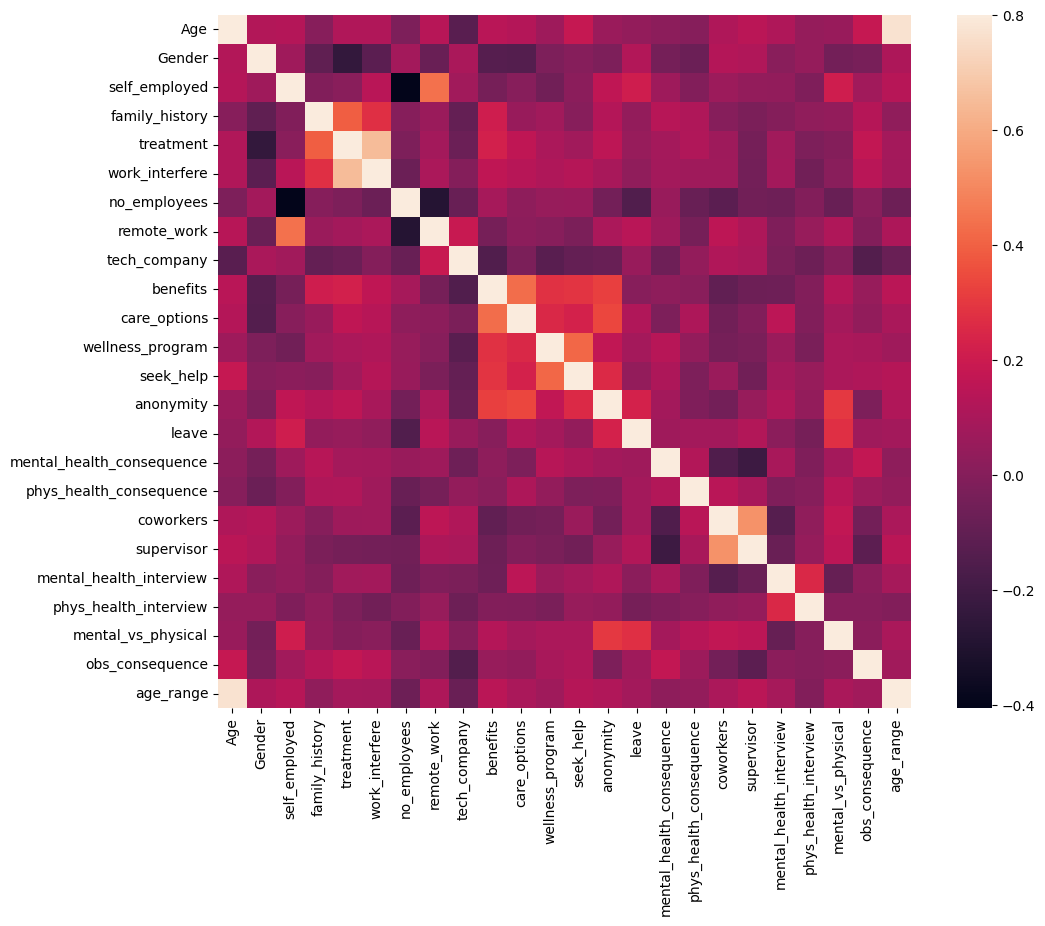

In [11]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

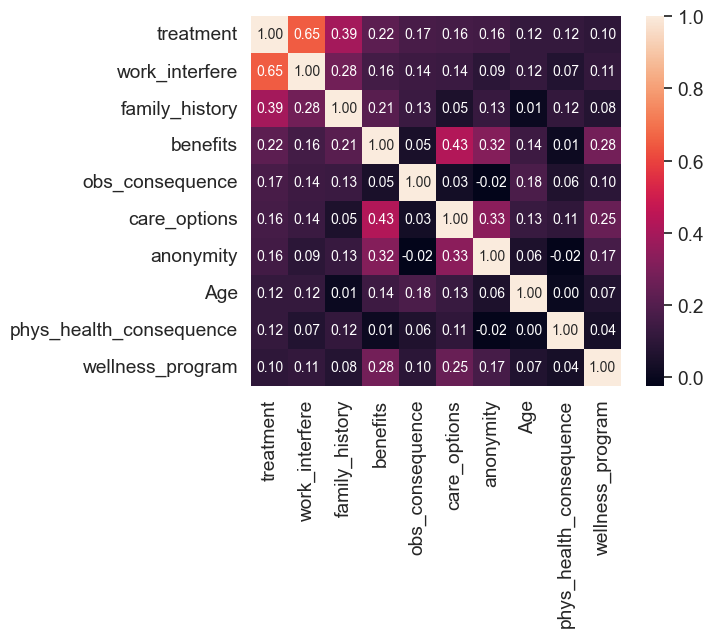

In [12]:
k = 10 
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\sohail\AppData\Local\Temp\ipykernel_6432\2951271029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

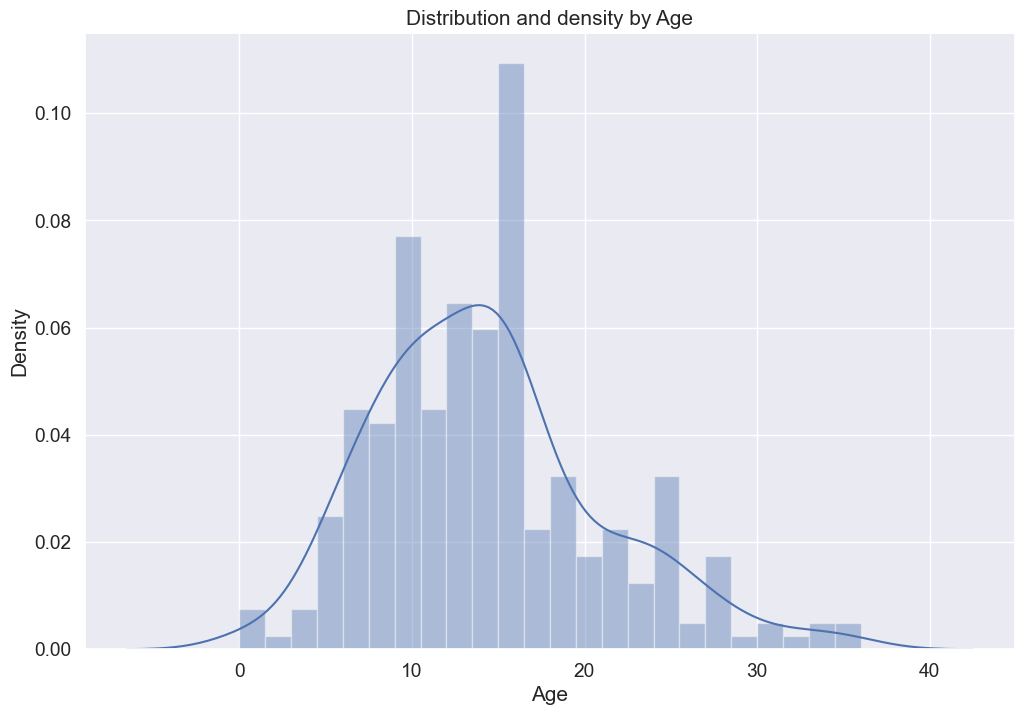

In [13]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

C:\Users\sohail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\sohail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

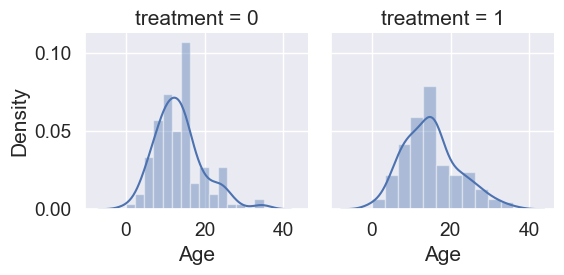

In [14]:
j = sns.FacetGrid(train_df, col='treatment')
j = j.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribution by treated or not')

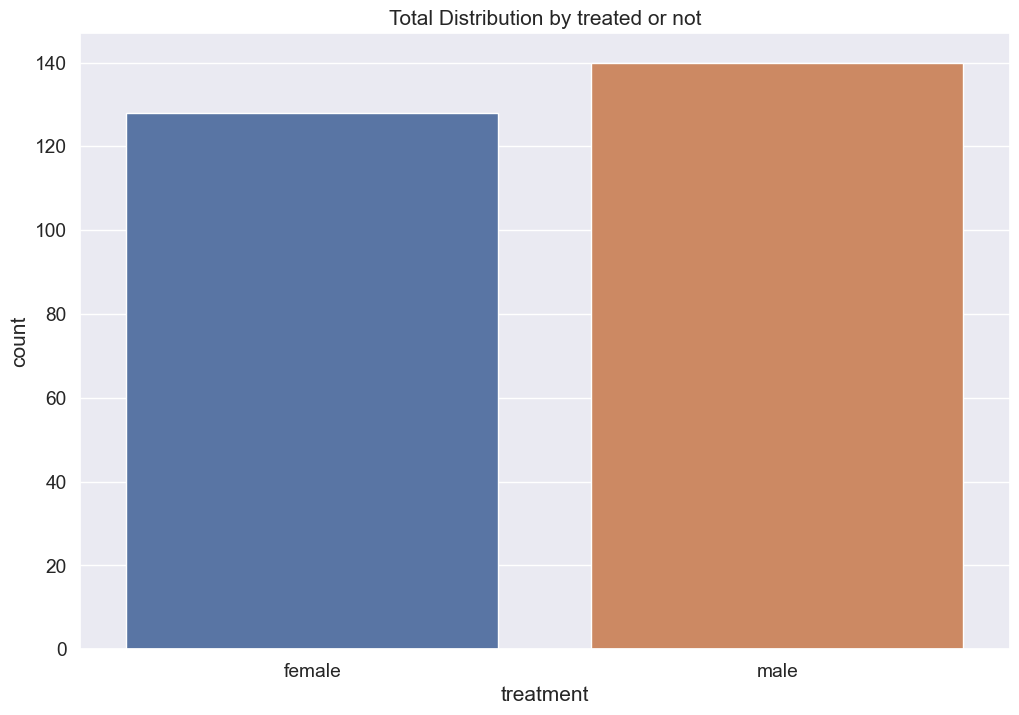

In [15]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=train_df)
j.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')

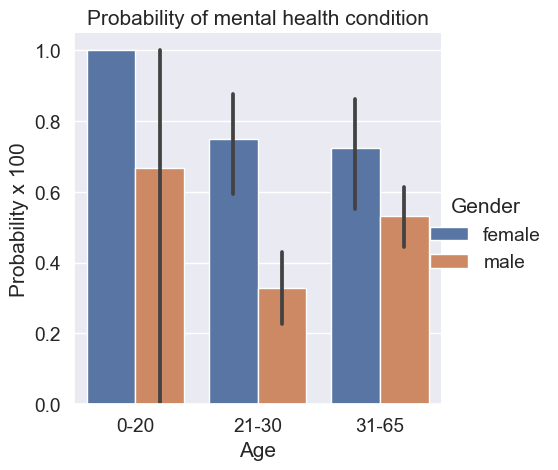

In [16]:
o = labelDict['label_age_range']
j = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar")
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

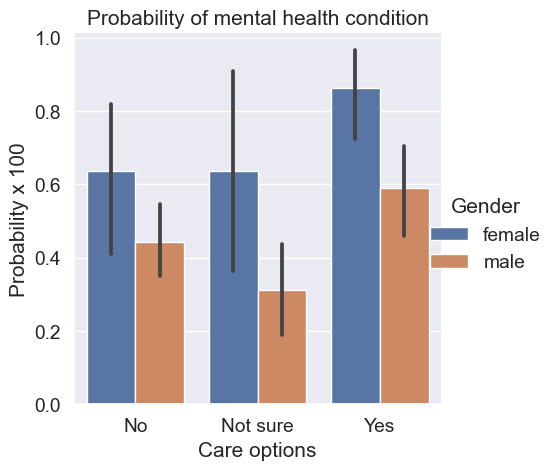

In [17]:
o = labelDict['label_care_options']
j = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar")
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

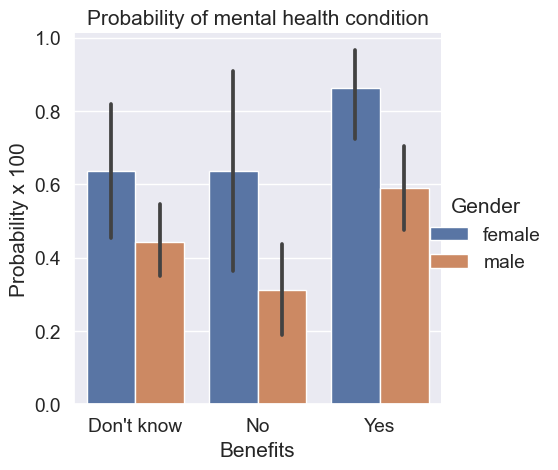

In [18]:
o = labelDict['label_benefits']
j = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar")
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

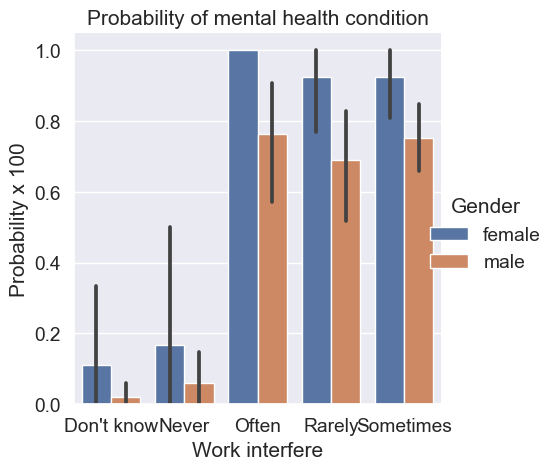

In [19]:
o = labelDict['label_work_interfere']
j = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar")
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [20]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
11,0.305556,1,0,0,0,1,1,1,1,0,...,0,1,1,2,2,2,2,0,0,1
12,0.666667,0,0,1,1,4,2,0,0,2,...,1,2,2,2,2,0,0,1,1,2
15,0.305556,0,0,1,1,3,2,0,1,2,...,2,1,1,2,1,0,0,0,0,1
18,0.777778,1,1,1,0,4,0,1,1,2,...,4,1,1,2,2,1,2,2,1,2
21,0.361111,1,1,0,0,1,0,1,1,1,...,1,1,1,1,1,1,0,2,0,2


([<matplotlib.axis.XTick at 0x23737143580>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'family_history'),
  Text(3, 0, 'benefits'),
  Text(4, 0, 'care_options'),
  Text(5, 0, 'anonymity'),
  Text(6, 0, 'leave'),
  Text(7, 0, 'work_interfere')])

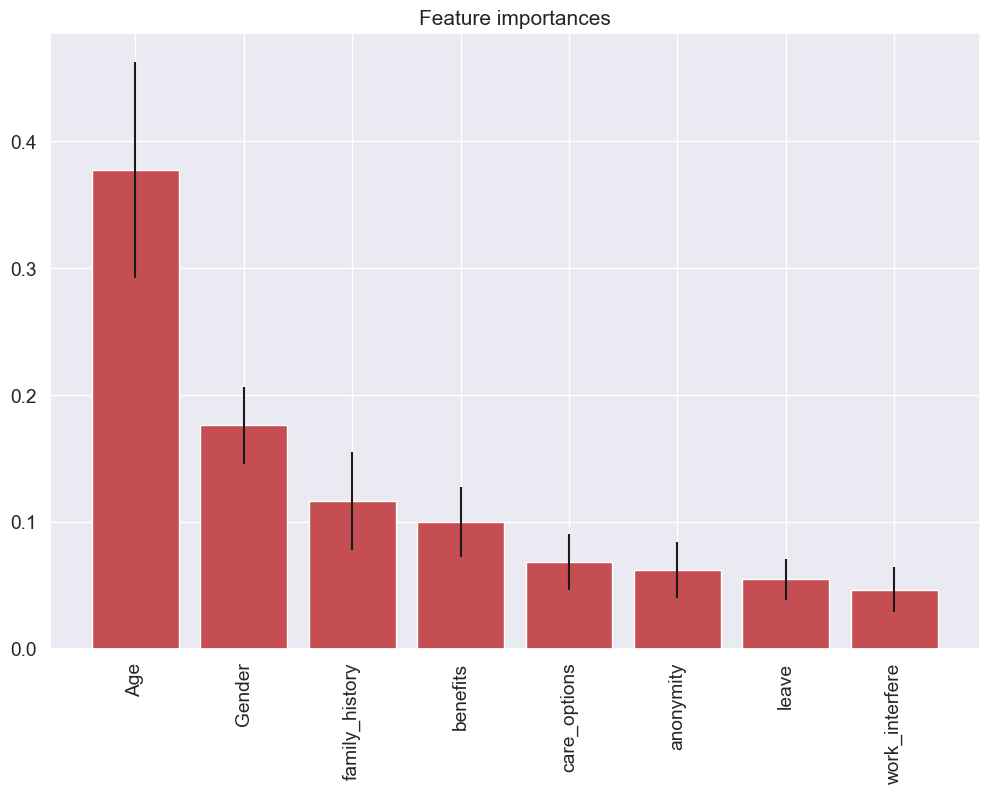

In [21]:
# define X and y
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols1]
y = train_df.treatment
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols1[f])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')

In [22]:
def evalClassModel(model, y_test1, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test1, y_pred_class))
    print('Null accuracy:n', y_test1.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', y_test1.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test1.mean())
    print('True:', y_test1.values[0:25])
    print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test1, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test1, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test1, y_pred_class))
    fp_rate = FP / float(TN + FP)
    print('False Positive Rate:', fp_rate)
    print('Precision:', metrics.precision_score(y_test1, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test1, y_pred_class))
    # calculate cross-validated AUC
    print('Crossvalidated AUC values:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:n', model.predict(X_test1)[0:10])
    print('First 10 predicted probabilities of class members:n', model.predict_proba(X_test1)[0:10])
    model.predict_proba(X_test1)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test1)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
      
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[0]
    print('First 10 predicted probabilities:n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test1, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
       
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test1, predict_mine)
    print(confusion)
    return accuracy

In [23]:
def tuningCV(knn):
    k_Range = list(range(1, 31))
    k_scores = []
    for k in k_Range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_Range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [24]:
def tuningGridSerach(knn):
    
    k_Range = list(range(1, 31))
    print(k_Range)
   
    param_grid = dict(n_neighbors=k_Range)
    print(param_grid)
   
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    
    grid.fit(X, y)
    grid.grid_scores1_
    
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    grid_mean_scores1 = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores1)
    # plot the results
    plt.plot(k_Range, grid_mean_scores1)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [25]:
def tuningRandomizedSearchCV(model, param_dist):
   
    rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand1.fit(X, y)
    rand1.cv_results_
   
    print('Rand1. Best Score: ', rand1.best_score_)
    print('Rand1. Best Params: ', rand1.best_params_)
   
    best_scores = []
    for _ in range(20):
        rand1 = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand1.fit(X, y)
        best_scores.append(round(rand1.best_score_, 3))
    print(best_scores)

In [26]:
def tuningMultParam(knn):
    
    k_Range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_grid = dict(N_neighbors=k_Range, weights=weight_options)
    print(param_grid)
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
   
    print(grid.grid_scores_)
   
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

Accuracy: 0.8024691358024691
Null accuracy:n 1    43
0    38
Name: treatment, dtype: int64
Percentage of ones: 0.5308641975308642
Percentage of zeros: 0.4691358024691358
True: [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
Pred: [1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1]


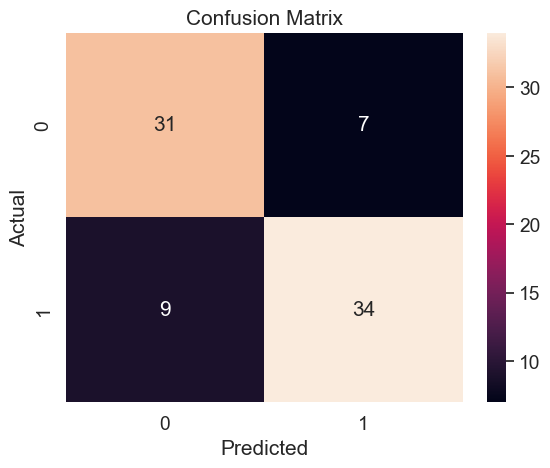

Classification Accuracy: 0.8024691358024691
Classification Error: 0.19753086419753085
False Positive Rate: 0.18421052631578946
Precision: 0.8292682926829268
AUC Score: 0.8032435740514077
Crossvalidated AUC values: 0.8930860805860806
First 10 predicted responses:n [1 1 1 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:n [[0.10429335 0.89570665]
 [0.22654662 0.77345338]
 [0.10471238 0.89528762]
 [0.77595854 0.22404146]
 [0.18543651 0.81456349]
 [0.34103472 0.65896528]
 [0.5011277  0.4988723 ]
 [0.41852254 0.58147746]
 [0.92793547 0.07206453]
 [0.40360769 0.59639231]]
First 10 predicted probabilities:n [[0.89570665]
 [0.77345338]
 [0.89528762]
 [0.22404146]
 [0.81456349]
 [0.65896528]
 [0.4988723 ]
 [0.58147746]
 [0.07206453]
 [0.59639231]]


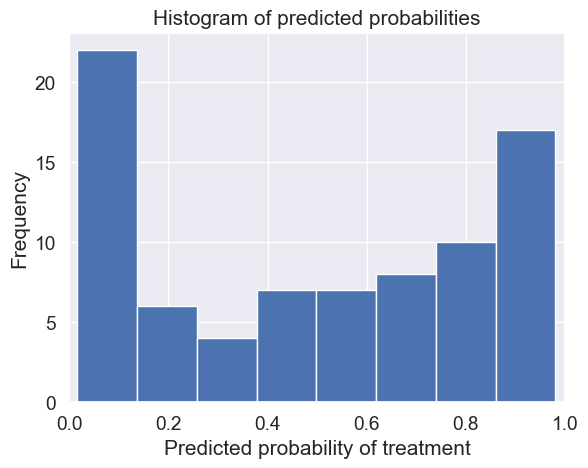

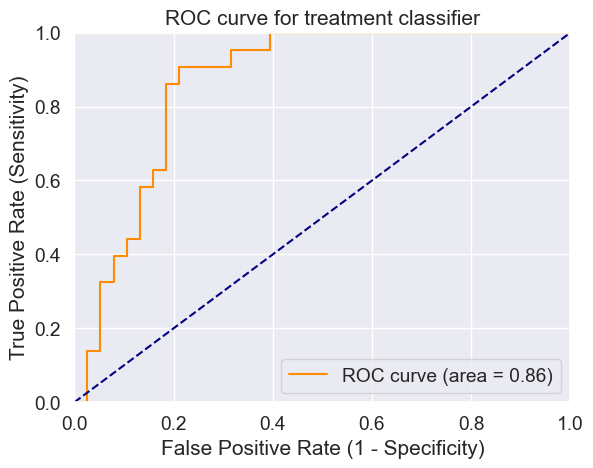

[[31  7]
 [ 9 34]]


In [27]:
def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train1, y_train1)
    y_pred_class = logreg.predict(X_test1)
    accuracy_score = evalClassModel(logreg, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100
logisticRegression()

Rand1. Best Score:  0.8394586894586895
Rand1. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.832, 0.836, 0.832, 0.832, 0.828, 0.832, 0.836, 0.832, 0.839, 0.836, 0.832, 0.836, 0.832, 0.828, 0.832, 0.832, 0.832, 0.832, 0.836, 0.839]
Accuracy: 0.8024691358024691
Null accuracy:n 1    43
0    38
Name: treatment, dtype: int64
Percentage of ones: 0.5308641975308642
Percentage of zeros: 0.4691358024691358
True: [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
Pred: [1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1]


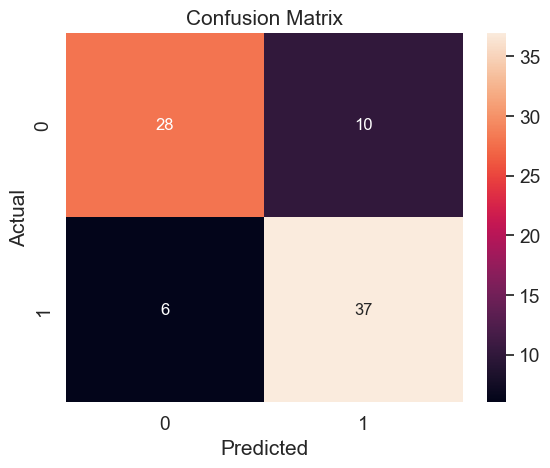

Classification Accuracy: 0.8024691358024691
Classification Error: 0.19753086419753085
False Positive Rate: 0.2631578947368421
Precision: 0.7872340425531915
AUC Score: 0.7986536107711139
Crossvalidated AUC values: 0.8694368131868131
First 10 predicted responses:n [1 1 1 0 1 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.18518519 0.81481481]
 [0.14814815 0.85185185]
 [0.14814815 0.85185185]
 [0.96296296 0.03703704]
 [0.11111111 0.88888889]
 [0.2962963  0.7037037 ]
 [0.37037037 0.62962963]
 [0.2962963  0.7037037 ]
 [0.96296296 0.03703704]
 [0.2962963  0.7037037 ]]
First 10 predicted probabilities:n [[0.81481481]
 [0.85185185]
 [0.85185185]
 [0.03703704]
 [0.88888889]
 [0.7037037 ]
 [0.62962963]
 [0.7037037 ]
 [0.03703704]
 [0.7037037 ]]


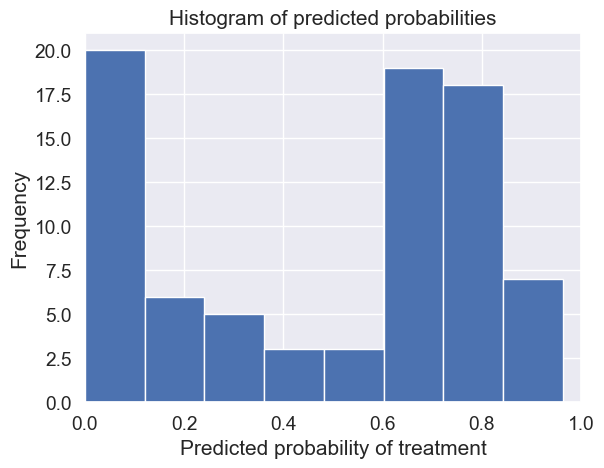

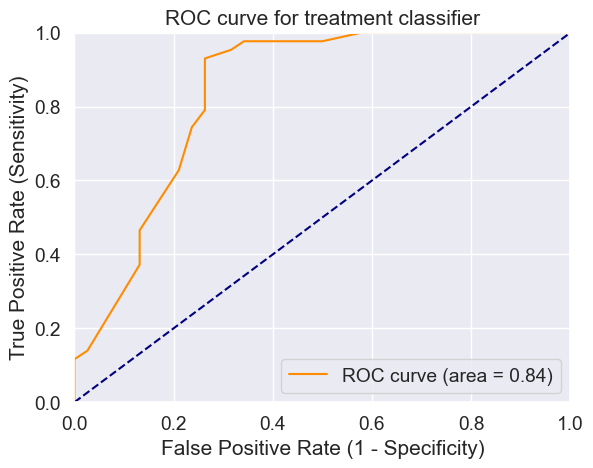

[[28 10]
 [ 6 37]]


In [28]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
   
    k_Range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_dist = dict(n_neighbors=k_Range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
   
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train1, y_train1)
   
    y_pred_class = knn.predict(X_test1)
    accuracy_score = evalClassModel(knn, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100
Knn()

Rand1. Best Score:  0.8508547008547008
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.851, 0.851, 0.851, 0.851, 0.843, 0.851, 0.851, 0.825, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.851, 0.847, 0.851, 0.832, 0.851, 0.851]
Accuracy: 0.8518518518518519
Null accuracy:n 1    43
0    38
Name: treatment, dtype: int64
Percentage of ones: 0.5308641975308642
Percentage of zeros: 0.4691358024691358
True: [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
Pred: [1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1]


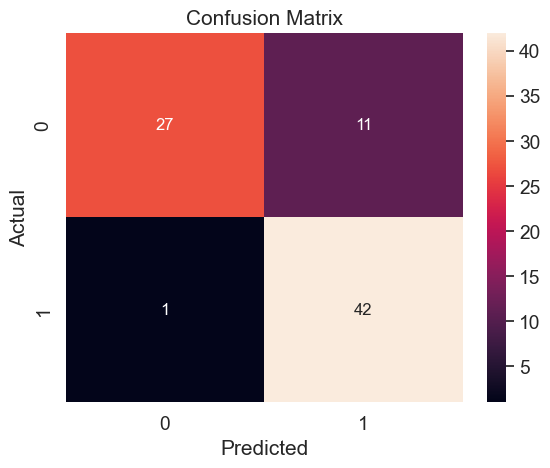

Classification Accuracy: 0.8518518518518519
Classification Error: 0.14814814814814814
False Positive Rate: 0.2894736842105263
Precision: 0.7924528301886793
AUC Score: 0.8436352509179926
Crossvalidated AUC values: 0.8931318681318683
First 10 predicted responses:n [1 1 1 0 1 1 1 1 0 1]
First 10 predicted probabilities of class members:n [[0.06666667 0.93333333]
 [0.41025641 0.58974359]
 [0.19354839 0.80645161]
 [0.91666667 0.08333333]
 [0.41025641 0.58974359]
 [0.41025641 0.58974359]
 [0.06666667 0.93333333]
 [0.41025641 0.58974359]
 [0.93333333 0.06666667]
 [0.41025641 0.58974359]]
First 10 predicted probabilities:n [[0.93333333]
 [0.58974359]
 [0.80645161]
 [0.08333333]
 [0.58974359]
 [0.58974359]
 [0.93333333]
 [0.58974359]
 [0.06666667]
 [0.58974359]]


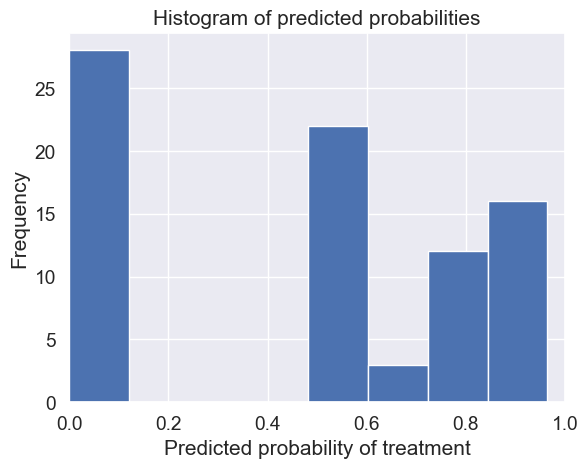

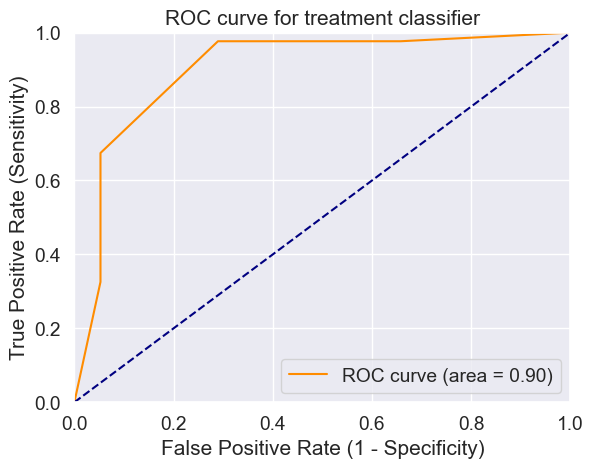

[[27 11]
 [ 1 42]]


In [29]:
def treeClassifier():
    # Calculating the best parameters
    tree1 = DecisionTreeClassifier()
    featuresSize = feature_cols1.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree1, param_dist)
    tree1 = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree1.fit(X_train1, y_train1)
    y_pred_class = tree1.predict(X_test1)
    accuracy_score = evalClassModel(tree1, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100
treeClassifier()

Rand1. Best Score:  0.8508547008547008
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.862, 0.862, 0.859, 0.869, 0.858, 0.855, 0.855, 0.858, 0.862, 0.855, 0.858, 0.851, 0.851, 0.851, 0.858, 0.855, 0.855, 0.858, 0.862, 0.855]
Accuracy: 0.8271604938271605
Null accuracy:n 1    43
0    38
Name: treatment, dtype: int64
Percentage of ones: 0.5308641975308642
Percentage of zeros: 0.4691358024691358
True: [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
Pred: [1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1]


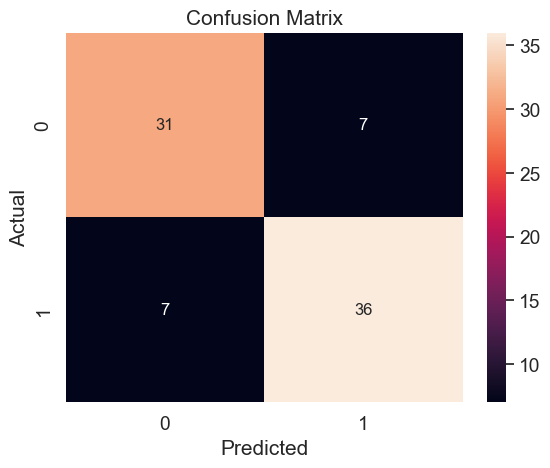

Classification Accuracy: 0.8271604938271605
Classification Error: 0.1728395061728395
False Positive Rate: 0.18421052631578946
Precision: 0.8372093023255814
AUC Score: 0.8264993880048961
Crossvalidated AUC values: 0.8822573260073261
First 10 predicted responses:n [1 1 1 0 1 1 1 0 0 1]
First 10 predicted probabilities of class members:n [[0.024 0.976]
 [0.352 0.648]
 [0.076 0.924]
 [0.724 0.276]
 [0.352 0.648]
 [0.212 0.788]
 [0.336 0.664]
 [0.608 0.392]
 [0.996 0.004]
 [0.4   0.6  ]]
First 10 predicted probabilities:n [[0.976]
 [0.648]
 [0.924]
 [0.276]
 [0.648]
 [0.788]
 [0.664]
 [0.392]
 [0.004]
 [0.6  ]]


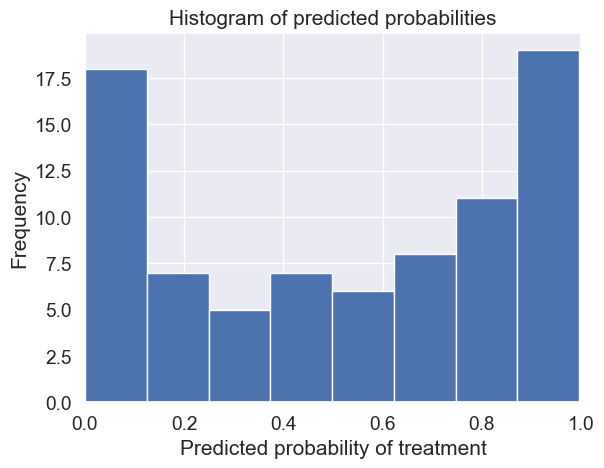

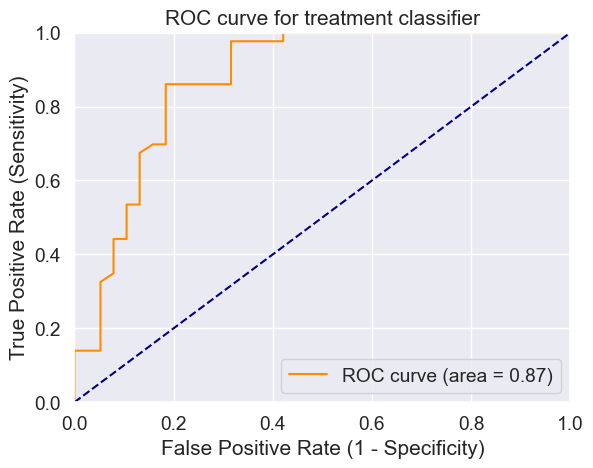

[[31  7]
 [ 7 36]]


In [30]:
def randomForest():
    # Calculating the best parameters
    forest1 = RandomForestClassifier(n_estimators = 20)
    featuresSize = feature_cols1.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest1, param_dist)
    forest1 = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train1, y_train1)
    y_pred_class = my_forest.predict(X_test1)
    accuracy_score = evalClassModel(my_forest, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100
randomForest()

Accuracy: 0.7530864197530864
Null accuracy:n 1    43
0    38
Name: treatment, dtype: int64
Percentage of ones: 0.5308641975308642
Percentage of zeros: 0.4691358024691358
True: [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
Pred: [1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1]


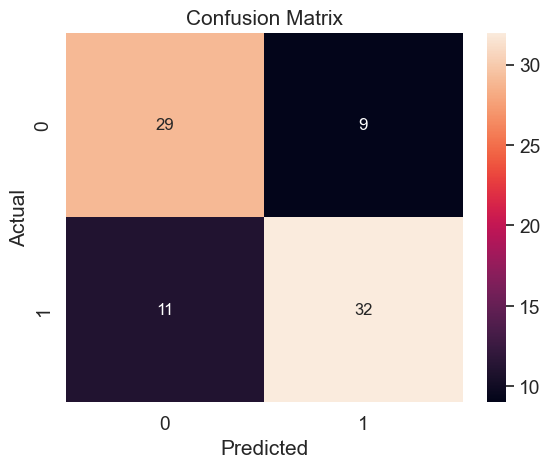

Classification Accuracy: 0.7530864197530864
Classification Error: 0.24691358024691357
False Positive Rate: 0.23684210526315788
Precision: 0.7804878048780488
AUC Score: 0.7536719706242351
Crossvalidated AUC values: 0.8346153846153846
First 10 predicted responses:n [1 0 1 0 1 1 1 0 0 0]
First 10 predicted probabilities of class members:n [[0.49790585 0.50209415]
 [0.50040227 0.49959773]
 [0.49751513 0.50248487]
 [0.5005774  0.4994226 ]
 [0.49980714 0.50019286]
 [0.49873254 0.50126746]
 [0.49757711 0.50242289]
 [0.5106869  0.4893131 ]
 [0.5029517  0.4970483 ]
 [0.5005204  0.4994796 ]]
First 10 predicted probabilities:n [[0.50209415]
 [0.49959773]
 [0.50248487]
 [0.4994226 ]
 [0.50019286]
 [0.50126746]
 [0.50242289]
 [0.4893131 ]
 [0.4970483 ]
 [0.4994796 ]]


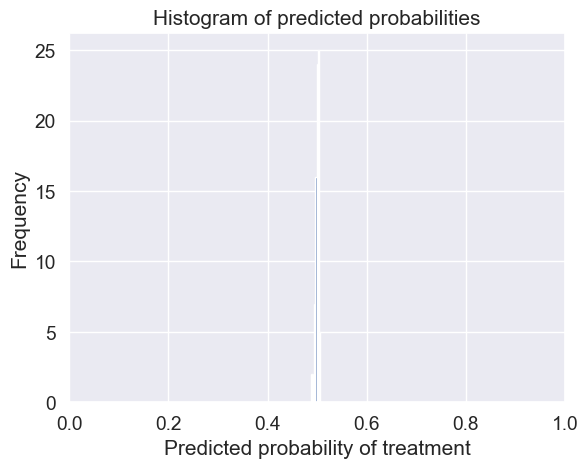

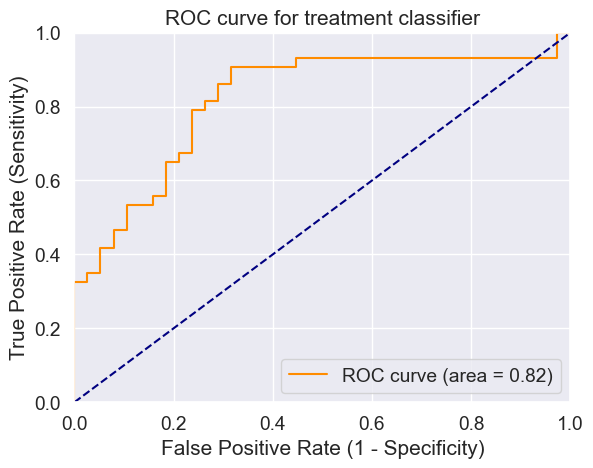

[[29  9]
 [11 32]]


In [31]:
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train1, y_train1)
    y_pred_class = boost.predict(X_test1)
    accuracy_score = evalClassModel(boost, y_test1, y_pred_class, True)
    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100
boosting()

In [32]:
import tensorflow as tf
import argparse

In [33]:
batch_size = 100
train_steps = 1000
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)
def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    dataset = dataset.batch(batch_size)
    # Return the dataset.
    return dataset

In [34]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [35]:
model = tf.compat.v1.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.compat.v1.train.ProximalAdagradOptimizer(
                                      learning_rate=0.1,
                                      l1_regularization_strength=0.001
                                    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sohail\\AppData\\Local\\Temp\\tmpanwaalpn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
model.train(input_fn=lambda:train_input_fn(X_train1, y_train1, batch_size), steps=train_steps)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sohail\AppData\Local\Temp\tmpanwaalpn\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 119.22127, step = 0
INFO:tensorflow:global_step/sec: 599.204
INFO:tensorflow:loss = 31.392729, step = 100 (0.169 sec)
INFO:tensorflow:global_step/sec: 759.597
INFO:tensorflow:loss = 20.903316, step = 200 (0.131 sec)
INFO:tensorflow:global_step/sec: 777.263
INFO:tensorflow:loss = 20.433197, step = 300 (0.129 sec)
INFO:tensorflow:globa

In [37]:
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test1, y_test1, batch_size))
print('nTest set accuracy: {accuracy:0.2f}n'.format(**eval_result))
#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['Neural Network'] = accuracy

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-03-22T08:33:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sohail\AppData\Local\Temp\tmpanwaalpn\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.68271s
INFO:tensorflow:Finished evaluation at 2023-03-22-08:33:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7654321, accuracy_baseline = 0.5308642, auc = 0.83323133, auc_precision_recall = 0.8311535, average_loss = 1.5144764, global_step = 1000, label/mean = 0.5308642, loss = 122.67259, precision = 0.8, prediction/mean = 0.47422224, recall = 0.74418604
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\so

In [38]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train1, y_train1, batch_size=batch_size)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sohail\AppData\Local\Temp\tmpanwaalpn\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [39]:
# Generate predictions from the model
template = ('nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')
# Dictionary for predictions
col1 = []
col2 = []
col3 = []
for idx, input, p in zip(X_train1.index, y_train1, predictions):
    v  = p["class_ids"][0]
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    #print(template.format(idx, v, 100 * probability, input))
results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()


,index,prediction,expected
0,635,0,0
1,1194,0,0
2,112,1,1
3,1211,0,0
4,543,1,1


In [40]:
# Generate predictions with the best methodology

clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test1)
# Write predictions to csv file
results = pd.DataFrame({'Index': X_test1.index, 'Treatment': dfTestPredictions})
# Save to file
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,438,1
1,1237,0
2,385,1
3,409,0
4,897,1


In [41]:
results = pd.DataFrame({'Index': X_test1.index, 'Treatment': dfTestPredictions})
print(results)

,Index,Treatment
0,438,1
1,1237,0
2,385,1
3,409,0
4,897,1
...,...,...
76,1222,1
77,1112,0
78,175,0
79,500,0
